<a href="https://www.kaggle.com/code/utkarshx27/physical-attributes-active-gender-study?scriptVersionId=155455545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <div style="padding: 40px;color:white;margin:10;font-size:90%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTkxNjM4NC13aWtpbWVkaWEtaW1hZ2Uta293ZXdrYTYuanBn.jpg)"><b><span style='color:white'>Analyzing Body Measurements Dataset</span></b> </div>
***

|   Variable | Description                                                                                       |
|------------|---------------------------------------------------------------------------------------------------|
|     bia_di | Respondent's biacromial diameter in centimeters.                                                  |
|     bii_di | Respondent's biiliac diameter (pelvic breadth) in centimeters.                                    |
|     bit_di | Respondent's bitrochanteric diameter in centimeters.                                              |
|     che_de | Respondent's chest depth in centimeters, measured between spine and sternum at nipple level, mid-expiration. |
|     che_di | Respondent's chest diameter in centimeters, measured at nipple level, mid-expiration.             |
|     elb_di | Respondent's elbow diameter in centimeters, measured as sum of two elbows.                        |
|     wri_di | Respondent's wrist diameter in centimeters, measured as sum of two wrists.                        |
|     kne_di | Respondent's knee diameter in centimeters, measured as sum of two knees.                          |
|     ank_di | Respondent's ankle diameter in centimeters, measured as sum of two ankles.                        |
|     sho_gi | Respondent's shoulder girth in centimeters, measured over deltoid muscles.                         |
|     che_gi | Respondent's chest girth in centimeters, measured at nipple line in males and just above breast tissue in females, mid-expiration. |
|     wai_gi | Respondent's waist girth in centimeters, measured at the narrowest part of torso below the rib cage as average of contracted and relaxed position. |
|     nav_gi | Respondent's navel (abdominal) girth in centimeters, measured at umbilicus and iliac crest using iliac crest as a landmark. |
|     hip_gi | Respondent's hip girth in centimeters, measured at the level of bitrochanteric diameter.         |
|     thi_gi | Respondent's thigh girth in centimeters, measured below gluteal fold as the average of right and left girths. |
|     bic_gi | Respondent's bicep girth in centimeters, measured when flexed as the average of right and left girths. |
|     for_gi | Respondent's forearm girth in centimeters, measured when extended, palm up as the average of right and left girths. |
|     kne_gi | Respondent's knee diameter in centimeters, measured as sum of two knees.                          |
|     cal_gi | Respondent's calf maximum girth in centimeters, measured as average of right and left girths.    |
|     ank_gi | Respondent's ankle minimum girth in centimeters, measured as average of right and left girths.    |
|     wri_gi | Respondent's wrist minimum girth in centimeters, measured as average of right and left girths.    |
|        age | Respondent's age in years.                                                                        |
|        wgt | Respondent's weight in kilograms.                                                                 |
|        hgt | Respondent's height in centimeters.                                                               |
|        sex | Categorical vector: 1 if the respondent is male, 0 if female.                                    |


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/kaggle/input/body-measurements/dataset-310405444.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['missing'] = df.isnull().sum().values
    summ['missing[%]'] = df.isnull().sum().values / len(df) * 100
    summ['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['median'] = df.median().values
    summ['std'] = df.std().values

    numeric_columns = df.select_dtypes(include=np.number).columns
    for col in numeric_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        summ.loc[col, 'outliers'] = outliers.count()
        summ.loc[col, 'lower_bound'] = lower_bound
        summ.loc[col, 'upper_bound'] = upper_bound

    return summ

summary(data)

data shape: (507, 25)


,data type,missing,missing[%],unique,min,max,median,std,outliers,lower_bound,upper_bound
bia_di,float64,0,0.0,113,32.4,47.4,38.7,3.059132,0.0,28.775,48.575
bii_di,float64,0,0.0,90,18.7,34.7,28.0,2.206308,8.0,22.375,33.375
bit_di,float64,0,0.0,90,24.7,38.0,32.0,2.030916,4.0,26.475,37.475
che_de,float64,0,0.0,97,14.3,27.5,19.0,2.515877,4.0,11.900,26.300
che_di,float64,0,0.0,102,22.2,35.6,27.8,2.741650,0.0,19.200,36.400
elb_di,float64,0,0.0,63,9.9,16.7,13.3,1.352906,0.0,9.400,17.400
wri_di,float64,0,0.0,47,8.1,13.3,10.5,0.944361,1.0,7.700,13.300
kne_di,float64,0,0.0,65,15.7,24.3,18.7,1.347595,5.0,15.350,22.150
ank_di,float64,0,0.0,59,9.9,17.2,13.8,1.247351,1.0,10.300,17.500
sho_gi,float64,0,0.0,272,85.9,134.8,108.2,10.374834,0.0,73.800,142.200


# Distribution:

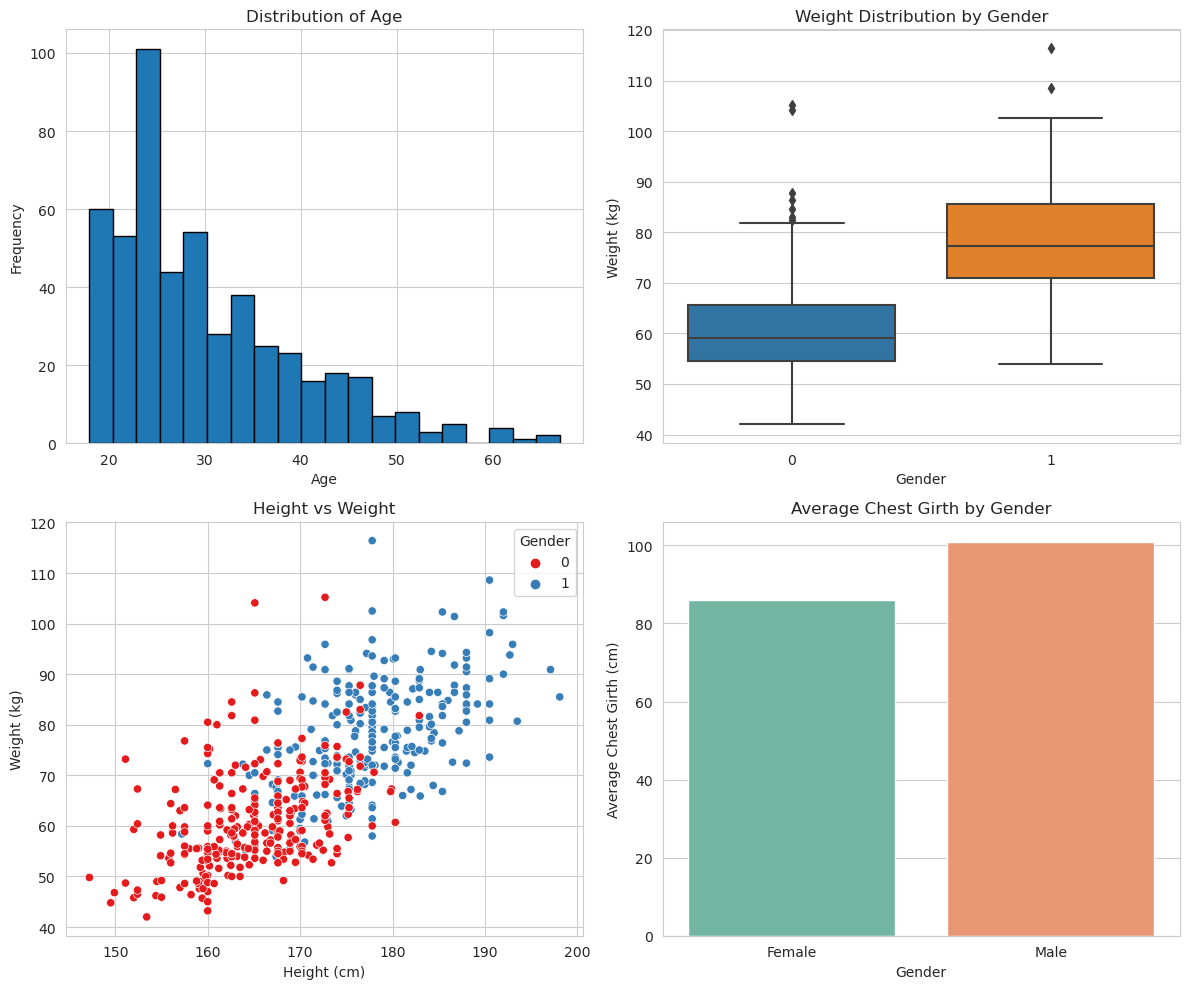

In [3]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(data['age'], edgecolor='black', bins=20)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Age')

sns.boxplot(x='sex', y='wgt', data=data, ax=axes[0, 1])
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Weight (kg)')
axes[0, 1].set_title('Weight Distribution by Gender')

sns.scatterplot(x='hgt', y='wgt', data=data, hue='sex', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_xlabel('Height (cm)')
axes[1, 0].set_ylabel('Weight (kg)')
axes[1, 0].set_title('Height vs Weight')
axes[1, 0].legend(title='Gender')

avg_chest_girth = data.groupby('sex')['che_gi'].mean()
sns.barplot(x=['Female', 'Male'], y=avg_chest_girth, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Average Chest Girth (cm)')
axes[1, 1].set_title('Average Chest Girth by Gender')

plt.tight_layout()
plt.show()

# Gender Differences:

In [4]:
men_data = data[data['sex'] == 1]
women_data = data[data['sex'] == 0]

for column in ['hip_gi', 'wai_gi', 'thi_gi']:
    t_stat, p_value = ttest_ind(men_data[column], women_data[column])
    print(f"{column}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

for column in ['hip_gi', 'wai_gi', 'thi_gi']:
    U_stat, p_value = mannwhitneyu(men_data[column], women_data[column])
    print(f"{column}: U-statistic = {U_stat:.3f}, p-value = {p_value:.3f}")

X = sm.add_constant(data[['hip_gi', 'wai_gi', 'thi_gi']])
y = data['sex']
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

hip_gi: t-statistic = 3.597, p-value = 0.000
wai_gi: t-statistic = 20.238, p-value = 0.000
thi_gi: t-statistic = -1.765, p-value = 0.078
hip_gi: U-statistic = 38439.000, p-value = 0.000
wai_gi: U-statistic = 58254.000, p-value = 0.000
thi_gi: U-statistic = 29909.000, p-value = 0.182
Optimization terminated successfully.
         Current function value: 0.201494
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    sex   No. Observations:                  507
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            3
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.7092
Time:                        05:13:34   Log-Likelihood:                -102.16
converged:                       True   LL-Null:                       -351.26
Covariance Type:            nonrobust   LLR p-value:         

# Body Composition Analysis:

In [5]:
data['bmi'] = data['wgt'] / ((data['hgt'] / 100) ** 2)

correlation_matrix = data[['bmi', 'hip_gi', 'wai_gi', 'thi_gi']].corr()
print(correlation_matrix)
X = sm.add_constant(data[['hip_gi', 'wai_gi', 'thi_gi']])
y = data['bmi']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

             bmi    hip_gi    wai_gi    thi_gi
bmi     1.000000  0.808978  0.821963  0.698530
hip_gi  0.808978  1.000000  0.692351  0.828941
wai_gi  0.821963  0.692351  1.000000  0.421085
thi_gi  0.698530  0.828941  0.421085  1.000000
                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     802.3
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          3.11e-191
Time:                        05:13:34   Log-Likelihood:                -875.13
No. Observations:                 507   AIC:                             1758.
Df Residuals:                     503   BIC:                             1775.
Df Model:                           3                                         
Covariance Type:            nonrobust                 

# Multivariate Analysis:

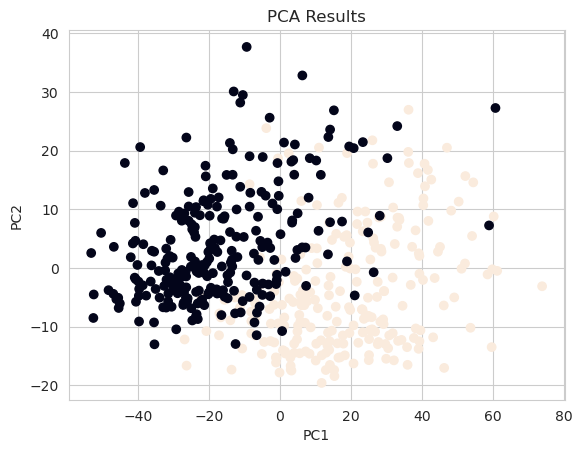

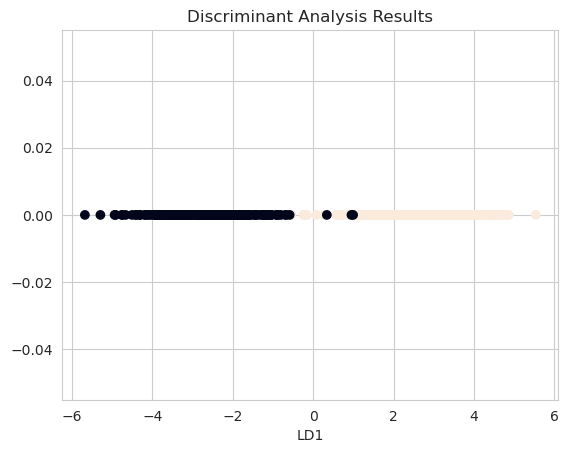

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


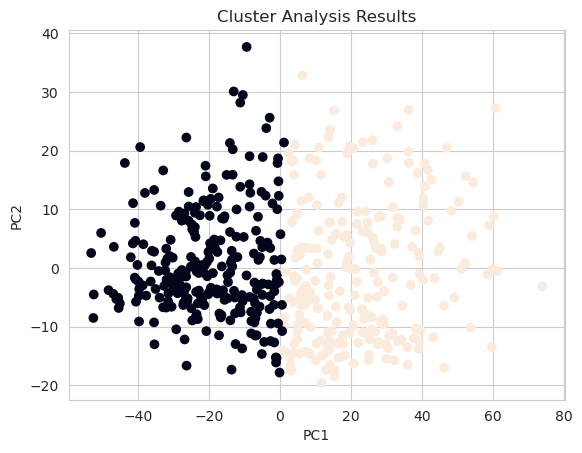

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.drop(['sex'], axis=1))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['sex'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results')
plt.show()

lda = LinearDiscriminantAnalysis(n_components=1)
lda_result = lda.fit_transform(data.drop(['sex'], axis=1), data['sex'])

plt.scatter(lda_result, [0] * len(lda_result), c=data['sex'])
plt.xlabel('LD1')
plt.title('Discriminant Analysis Results')
plt.show()

kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(data.drop(['sex'], axis=1))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Analysis Results')
plt.show()

# relationships between different body measurements:

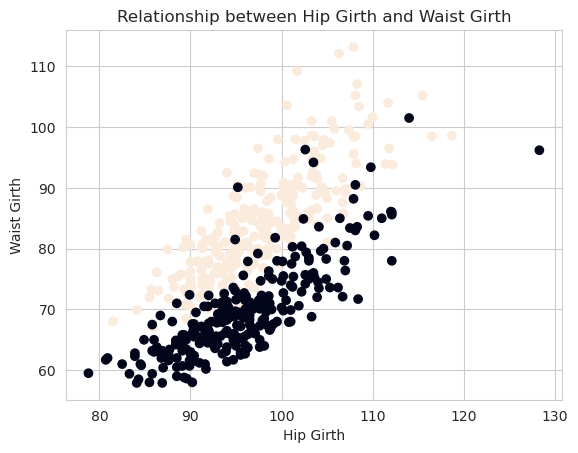

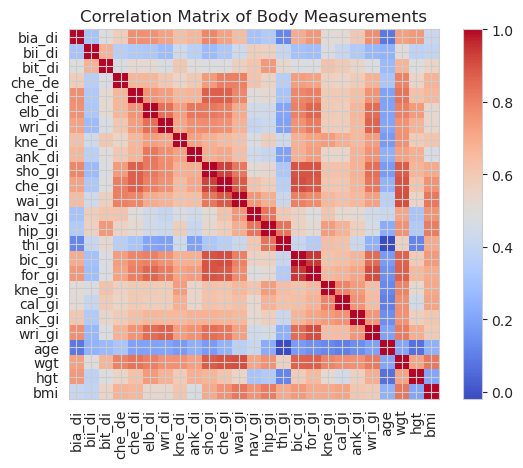

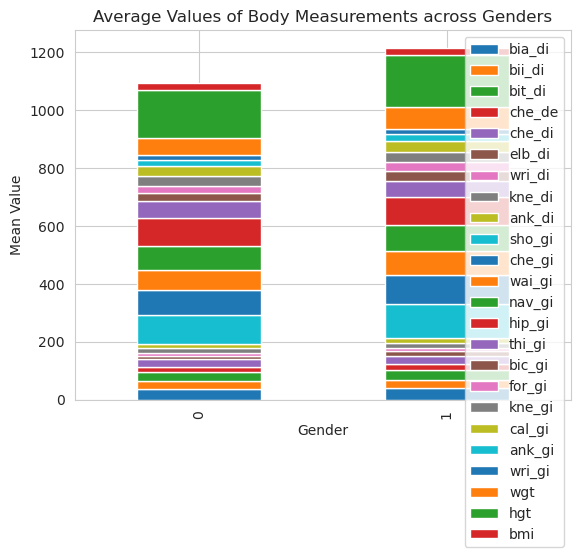

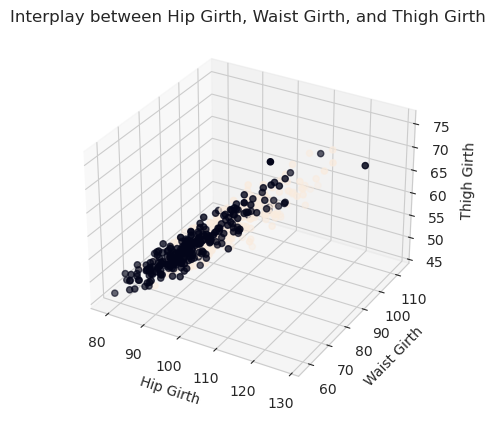

In [7]:
plt.scatter(data['hip_gi'], data['wai_gi'], c=data['sex'])
plt.xlabel('Hip Girth')
plt.ylabel('Waist Girth')
plt.title('Relationship between Hip Girth and Waist Girth')
plt.show()

correlation_matrix = data.drop(['sex'], axis=1).corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Body Measurements')
plt.show()

mean_values = data.groupby('sex').mean().drop(['age'], axis=1)
mean_values.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Mean Value')
plt.title('Average Values of Body Measurements across Genders')
plt.legend(loc='upper right')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['hip_gi'], data['wai_gi'], data['thi_gi'], c=data['sex'])
ax.set_xlabel('Hip Girth')
ax.set_ylabel('Waist Girth')
ax.set_zlabel('Thigh Girth')
ax.set_title('Interplay between Hip Girth, Waist Girth, and Thigh Girth')
plt.show()

# Model

In [8]:
X = data.drop("sex", axis=1)
y = data["sex"]

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print("Coefficients:", model.coef_)

statistics = data.describe()
print(statistics)

Coefficients: [ 0.0235211  -0.00760889 -0.00776156  0.01312835 -0.00272909  0.03163128
 -0.01318517  0.00855058  0.04593598  0.00404474 -0.00516799  0.02695536
 -0.01370934 -0.00677184 -0.01976019  0.02528615  0.04425568 -0.0059462
 -0.00377642  0.0030329  -0.0165947  -0.00092893 -0.02914383  0.02602781
  0.06133142]
           bia_di      bii_di      bit_di      che_de      che_di      elb_di  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean    38.811440   27.829980   31.980473   19.226036   27.973767   13.385207   
std      3.059132    2.206308    2.030916    2.515877    2.741650    1.352906   
min     32.400000   18.700000   24.700000   14.300000   22.200000    9.900000   
25%     36.200000   26.500000   30.600000   17.300000   25.650000   12.400000   
50%     38.700000   28.000000   32.000000   19.000000   27.800000   13.300000   
75%     41.150000   29.250000   33.350000   20.900000   29.950000   14.400000   
max     47.400000   34.700000   3